In [1]:
# Basic imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Display settings
pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid", context="notebook")

RANDOM_STATE = 42


In [2]:
# Load the data
# Change the path if your file is somewhere else
df = pd.read_csv("covtype.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
print("DataFrame info:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


Unique classes in target: [5 2 1 7 3 6 4]

Class distribution (counts):
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

Class distribution (proportions):
Cover_Type
2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: proportion, dtype: float64


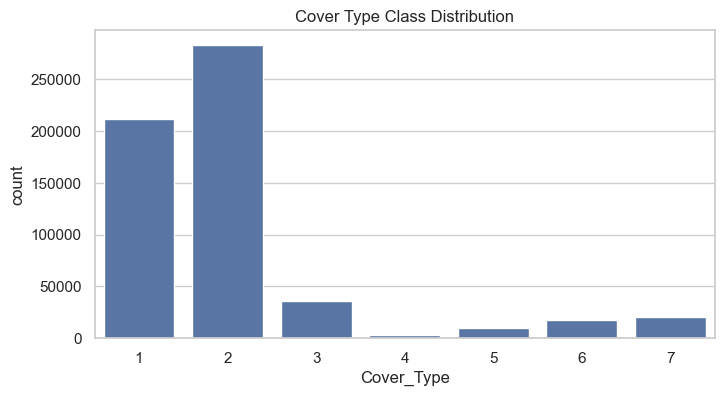

In [5]:
target_col = "Cover_Type"

print("Unique classes in target:", df[target_col].unique())
print("\nClass distribution (counts):")
print(df[target_col].value_counts())

print("\nClass distribution (proportions):")
print(df[target_col].value_counts(normalize=True))

plt.figure(figsize=(8, 4))
sns.countplot(x=target_col, data=df)
plt.title("Cover Type Class Distribution")
plt.show()


In [6]:
# Known continuous columns in this dataset (standard Forest Cover Type)
continuous_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Everything else except target and continuous is treated as categorical/binary
other_cols = [c for c in df.columns if c not in continuous_cols + [target_col]]

print("Continuous columns:", continuous_cols)
print("\nOther columns (likely wilderness/soil one-hots):")
print(other_cols)


Continuous columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

Other columns (likely wilderness/soil one-hots):
['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


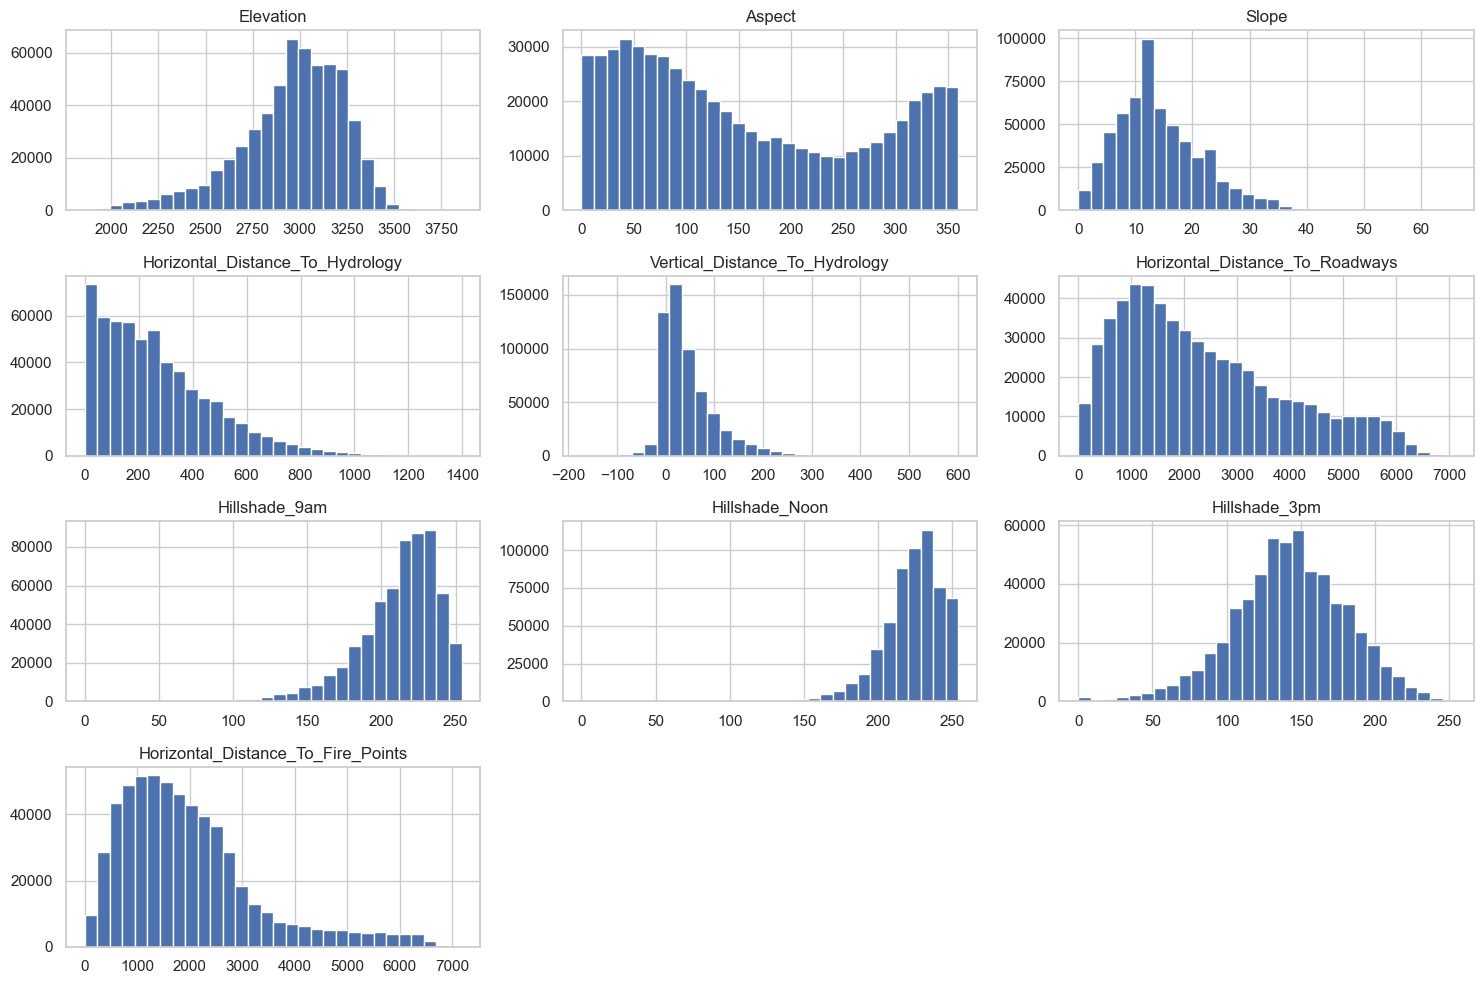

In [7]:
df[continuous_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


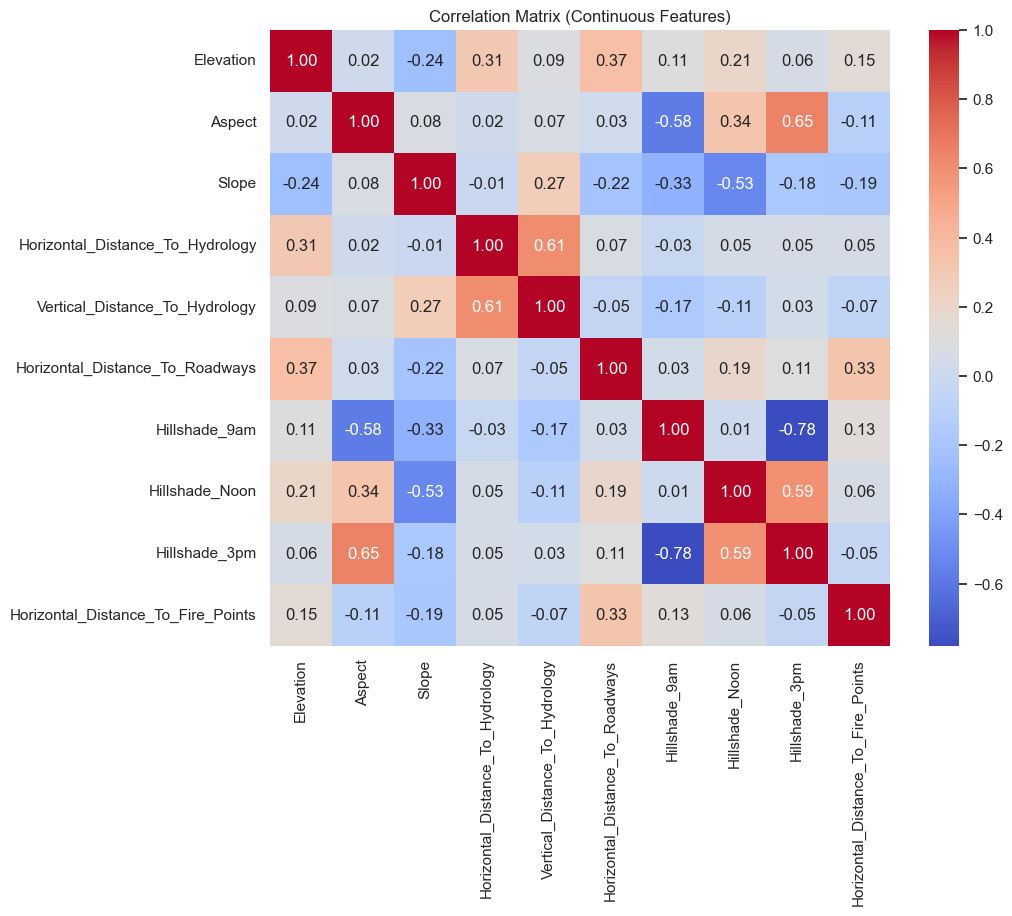

In [8]:
plt.figure(figsize=(10, 8))
corr = df[continuous_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Continuous Features)")
plt.show()


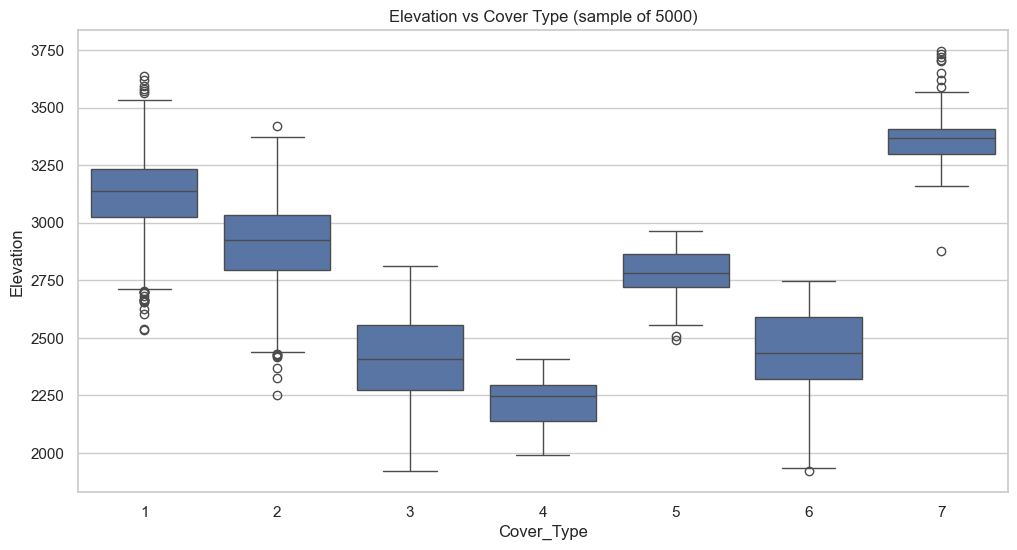

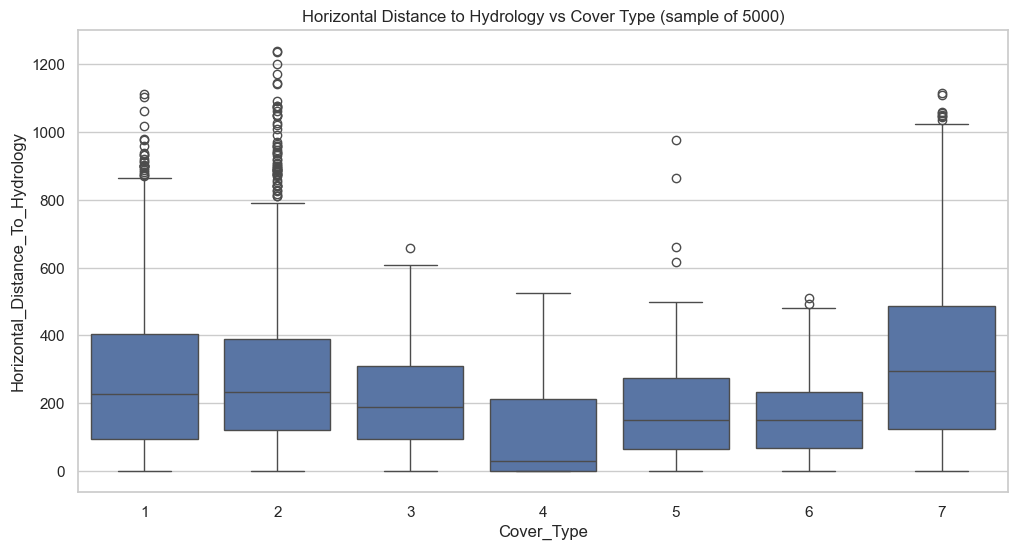

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col, y='Elevation', data=df.sample(5000, random_state=RANDOM_STATE))
plt.title("Elevation vs Cover Type (sample of 5000)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col, y='Horizontal_Distance_To_Hydrology',
            data=df.sample(5000, random_state=RANDOM_STATE))
plt.title("Horizontal Distance to Hydrology vs Cover Type (sample of 5000)")
plt.show()


Wilderness columns: ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
Number of Soil_Type columns: 40

Wilderness Area counts:
Wilderness_Area1    260796
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64

Top 10 most common soil types:
Soil_Type29    115247
Soil_Type23     57752
Soil_Type32     52519
Soil_Type33     45154
Soil_Type22     33373
Soil_Type10     32634
Soil_Type30     30170
Soil_Type12     29971
Soil_Type31     25666
Soil_Type24     21278
dtype: int64


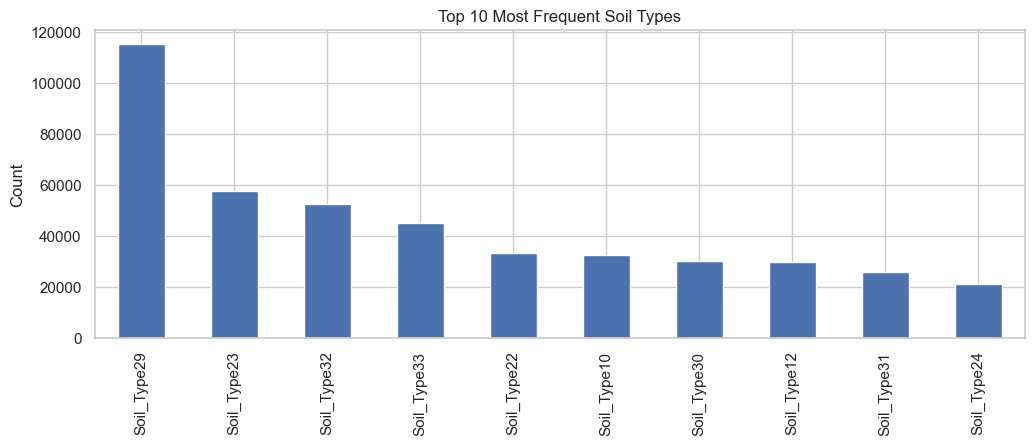

In [10]:
# Wilderness columns usually start with 'Wilderness_Area'
wilderness_cols = [c for c in df.columns if c.startswith("Wilderness_Area")]
soil_cols = [c for c in df.columns if c.startswith("Soil_Type")]

print("Wilderness columns:", wilderness_cols)
print("Number of Soil_Type columns:", len(soil_cols))

# Count how many samples in each wilderness area
print("\nWilderness Area counts:")
print(df[wilderness_cols].sum())

# Count how many samples for each soil type
soil_counts = df[soil_cols].sum().sort_values(ascending=False)
print("\nTop 10 most common soil types:")
print(soil_counts.head(10))

plt.figure(figsize=(12, 4))
soil_counts.head(10).plot(kind="bar")
plt.title("Top 10 Most Frequent Soil Types")
plt.ylabel("Count")
plt.show()


In [11]:
df['Hydro_Euclidean'] = np.sqrt(
    df['Horizontal_Distance_To_Hydrology']**2 +
    df['Vertical_Distance_To_Hydrology']**2
)

print(df[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
          'Hydro_Euclidean']].head())


   Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
0                               258                               0   
1                               212                              -6   
2                               268                              65   
3                               242                             118   
4                               153                              -1   

   Hydro_Euclidean  
0       258.000000  
1       212.084889  
2       275.769832  
3       269.235956  
4       153.003268  


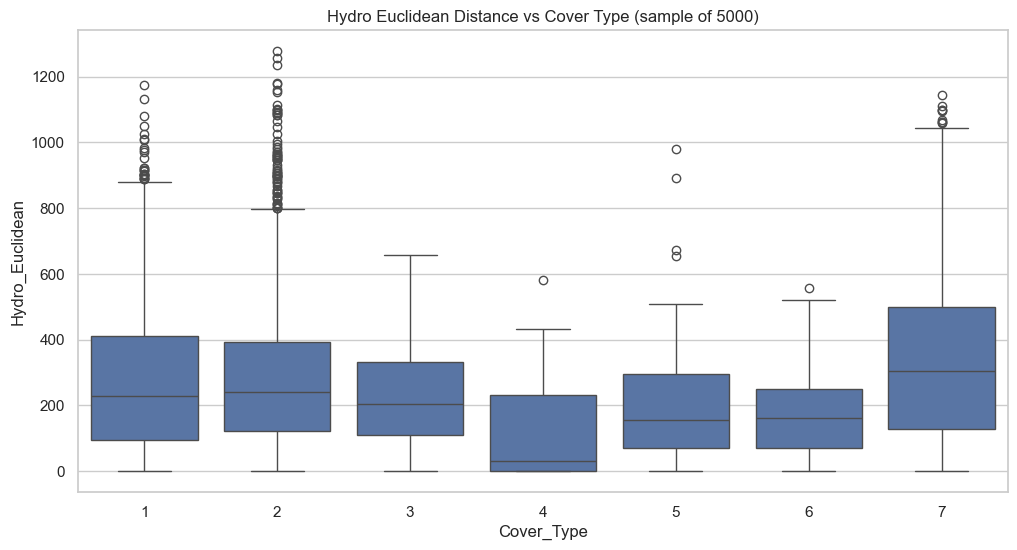

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=target_col,
            y='Hydro_Euclidean',
            data=df.sample(5000, random_state=RANDOM_STATE))
plt.title("Hydro Euclidean Distance vs Cover Type (sample of 5000)")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3

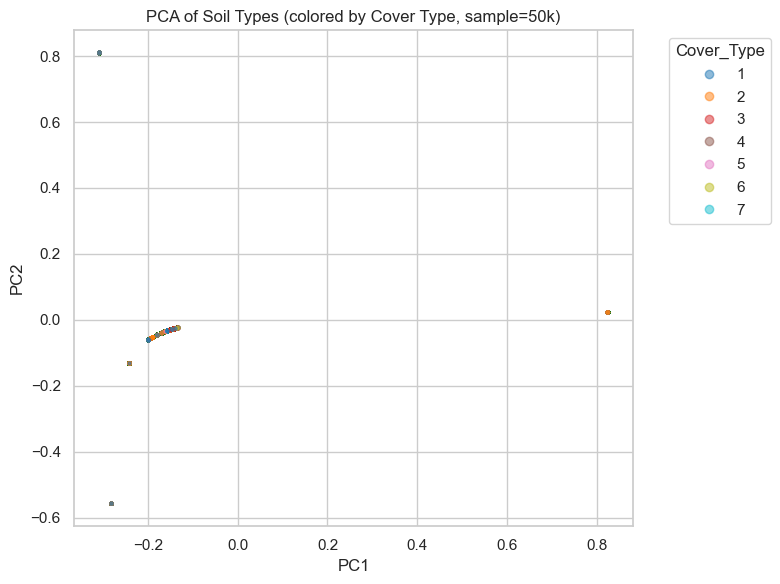

In [13]:
from sklearn.decomposition import PCA

# We use a sample for speed
sample_df = df.sample(50000, random_state=RANDOM_STATE)
X_soil_sample = sample_df[soil_cols].values
y_sample = sample_df[target_col].values

pca = PCA(n_components=2, random_state=RANDOM_STATE)
soil_pca = pca.fit_transform(X_soil_sample)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(soil_pca[:, 0], soil_pca[:, 1], c=y_sample, s=5, alpha=0.5, cmap="tab10")
plt.legend(*scatter.legend_elements(), title="Cover_Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA of Soil Types (colored by Cover Type, sample=50k)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


In [14]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (464809, 55)
X_test shape: (116203, 55)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)


Scaled train shape: (464809, 55)
Scaled test shape: (116203, 55)


In [16]:
def make_sample(X, y, max_samples=200000, random_state=RANDOM_STATE):
    """Return a (possibly) downsampled version of X, y for heavy models."""
    n = X.shape[0]
    if n <= max_samples:
        return X, y
    else:
        idx = np.random.RandomState(random_state).choice(n, size=max_samples, replace=False)
        if isinstance(X, np.ndarray):
            X_sub = X[idx]
        else:
            X_sub = X.iloc[idx]
        y_sub = y.iloc[idx]
        return X_sub, y_sub

print("Sampling helper ready.")


Sampling helper ready.


In [17]:
results = []

def evaluate_and_store(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n=== {model_name} ===")
    print("Accuracy:", acc)
    print("\nClassification report:")
    print(classification_report(y_true, y_pred, digits=4))
    
    # Store for summary table
    results.append({
        "Model": model_name,
        "Accuracy": acc
    })
    
    return acc


In [18]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=100,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

acc_logreg = evaluate_and_store("Logistic Regression (multinomial)", y_test, y_pred_logreg)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression (multinomial) ===
Accuracy: 0.7191638770083388

Classification report:
              precision    recall  f1-score   support

           1     0.7110    0.6932    0.7020     42368
           2     0.7439    0.7979    0.7699     56661
           3     0.6471    0.8388    0.7306      7151
           4     0.4839    0.2732    0.3492       549
           5     0.1235    0.0053    0.0101      1899
           6     0.4786    0.1872    0.2691      3473
           7     0.7043    0.5324    0.6064      4102

    accuracy                         0.7192    116203
   macro avg     0.5560    0.4754    0.4910    116203
weighted avg     0.7052    0.7192    0.7076    116203



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [19]:
# Sample subset for KNN to keep runtime reasonable
X_train_knn, y_train_knn = make_sample(X_train_scaled, y_train, max_samples=100000)

print("KNN training on subset shape:", X_train_knn.shape)

knn = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    n_jobs=-1
)

knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = evaluate_and_store("K-Nearest Neighbors (k=15)", y_test, y_pred_knn)


KNN training on subset shape: (100000, 55)

=== K-Nearest Neighbors (k=15) ===
Accuracy: 0.8648399783138129

Classification report:
              precision    recall  f1-score   support

           1     0.8821    0.8467    0.8641     42368
           2     0.8684    0.9099    0.8887     56661
           3     0.8120    0.8602    0.8354      7151
           4     0.7812    0.5592    0.6518       549
           5     0.7785    0.4850    0.5977      1899
           6     0.7129    0.6369    0.6727      3473
           7     0.8883    0.8474    0.8674      4102

    accuracy                         0.8648    116203
   macro avg     0.8176    0.7350    0.7682    116203
weighted avg     0.8641    0.8648    0.8633    116203



In [20]:
dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=RANDOM_STATE
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = evaluate_and_store("Decision Tree", y_test, y_pred_dt)



=== Decision Tree ===
Accuracy: 0.9384181131296094

Classification report:
              precision    recall  f1-score   support

           1     0.9384    0.9373    0.9379     42368
           2     0.9469    0.9483    0.9476     56661
           3     0.9295    0.9315    0.9305      7151
           4     0.8529    0.8452    0.8490       549
           5     0.8352    0.8325    0.8339      1899
           6     0.8791    0.8707    0.8749      3473
           7     0.9446    0.9442    0.9444      4102

    accuracy                         0.9384    116203
   macro avg     0.9038    0.9014    0.9026    116203
weighted avg     0.9384    0.9384    0.9384    116203



In [21]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = evaluate_and_store("Random Forest (150 trees)", y_test, y_pred_rf)



=== Random Forest (150 trees) ===
Accuracy: 0.9547429928659329

Classification report:
              precision    recall  f1-score   support

           1     0.9643    0.9435    0.9538     42368
           2     0.9501    0.9734    0.9616     56661
           3     0.9400    0.9613    0.9505      7151
           4     0.9091    0.8561    0.8818       549
           5     0.9526    0.7836    0.8599      1899
           6     0.9348    0.8923    0.9131      3473
           7     0.9739    0.9471    0.9603      4102

    accuracy                         0.9547    116203
   macro avg     0.9464    0.9082    0.9258    116203
weighted avg     0.9549    0.9547    0.9545    116203



In [22]:
hgb = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=None,
    max_iter=100,
    random_state=RANDOM_STATE
)

hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

acc_hgb = evaluate_and_store("HistGradientBoosting", y_test, y_pred_hgb)



=== HistGradientBoosting ===
Accuracy: 0.8308219237024862

Classification report:
              precision    recall  f1-score   support

           1     0.8271    0.7887    0.8074     42368
           2     0.8305    0.8704    0.8500     56661
           3     0.8407    0.8852    0.8624      7151
           4     0.7205    0.7559    0.7378       549
           5     0.8069    0.6008    0.6888      1899
           6     0.7983    0.7008    0.7464      3473
           7     0.9064    0.8520    0.8784      4102

    accuracy                         0.8308    116203
   macro avg     0.8186    0.7791    0.7959    116203
weighted avg     0.8307    0.8308    0.8300    116203



In [23]:
X_train_svm, y_train_svm = make_sample(X_train_scaled, y_train, max_samples=200000)

print("Linear SVM training on subset shape:", X_train_svm.shape)

svm_linear = LinearSVC(
    C=1.0,
    max_iter=5000,
    random_state=RANDOM_STATE
)

svm_linear.fit(X_train_svm, y_train_svm)
y_pred_svm = svm_linear.predict(X_test_scaled)

acc_svm = evaluate_and_store("Linear SVM", y_test, y_pred_svm)


Linear SVM training on subset shape: (200000, 55)

=== Linear SVM ===
Accuracy: 0.7114015989260174

Classification report:
              precision    recall  f1-score   support

           1     0.7071    0.6818    0.6942     42368
           2     0.7342    0.7973    0.7644     56661
           3     0.6103    0.8667    0.7162      7151
           4     0.6183    0.2095    0.3129       549
           5     0.5417    0.0068    0.0135      1899
           6     0.4266    0.0544    0.0965      3473
           7     0.6941    0.5095    0.5877      4102

    accuracy                         0.7114    116203
   macro avg     0.6189    0.4466    0.4551    116203
weighted avg     0.7024    0.7114    0.6953    116203



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [24]:
X_train_mlp, y_train_mlp = make_sample(X_train_scaled, y_train, max_samples=200000)

print("MLP training on subset shape:", X_train_mlp.shape)

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    batch_size=256,
    max_iter=30,
    early_stopping=True,
    random_state=RANDOM_STATE
)

mlp.fit(X_train_mlp, y_train_mlp)
y_pred_mlp = mlp.predict(X_test_scaled)

acc_mlp = evaluate_and_store("Neural Network (MLP)", y_test, y_pred_mlp)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


MLP training on subset shape: (200000, 55)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in


=== Neural Network (MLP) ===
Accuracy: 0.8716040033389844

Classification report:
              precision    recall  f1-score   support

           1     0.8837    0.8508    0.8669     42368
           2     0.8769    0.9094    0.8929     56661
           3     0.8356    0.8765    0.8556      7151
           4     0.8759    0.6557    0.7500       549
           5     0.7664    0.5666    0.6515      1899
           6     0.7486    0.6741    0.7094      3473
           7     0.8701    0.8932    0.8815      4102

    accuracy                         0.8716    116203
   macro avg     0.8368    0.7752    0.8011    116203
weighted avg     0.8710    0.8716    0.8706    116203



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [25]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df


,Model,Accuracy
0,Random Forest (150 trees),0.954743
1,Decision Tree,0.938418
2,Neural Network (MLP),0.871604
3,K-Nearest Neighbors (k=15),0.864840
4,HistGradientBoosting,0.830822
5,Logistic Regression (multinomial),0.719164
6,Linear SVM,0.711402


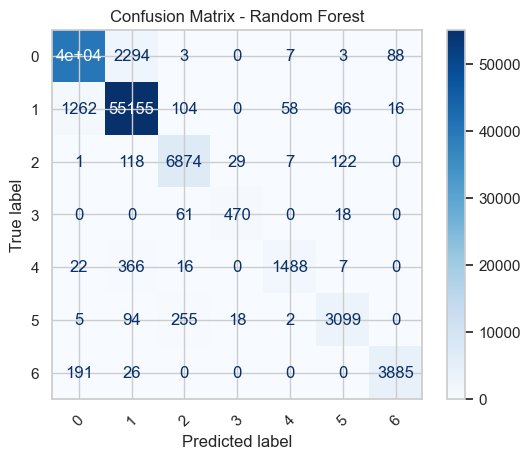

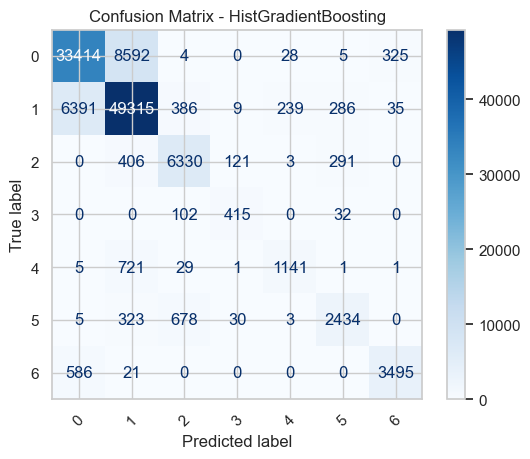

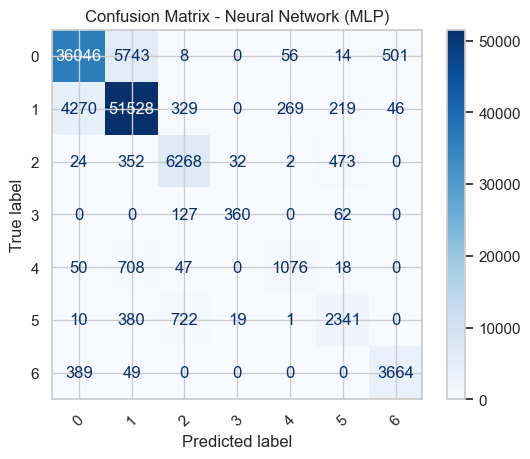

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_mat(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Example: confusion matrices for Random Forest and HistGradientBoosting and MLP
plot_conf_mat("Random Forest", y_test, y_pred_rf)
plot_conf_mat("HistGradientBoosting", y_test, y_pred_hgb)
plot_conf_mat("Neural Network (MLP)", y_test, y_pred_mlp)


Improvements

In [27]:
print("\n🔧 Improvement: Hyperparameter tuning for Random Forest\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [200, 300],
    "max_depth": [None, 20, 35],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    verbose=1,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("Best RF parameters:", rf_tuned.best_params_)

acc_rf_tuned = evaluate_and_store("Random Forest (tuned)", y_test, y_pred_rf_tuned)
print(f"Improvement vs original RF: {acc_rf_tuned - acc_rf:.4f}")



🔧 Improvement: Hyperparameter tuning for Random Forest

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best RF parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

=== Random Forest (tuned) ===
Accuracy: 0.9551560630964777

Classification report:
              precision    recall  f1-score   support

           1     0.9655    0.9433    0.9543     42368
           2     0.9498    0.9743    0.9619     56661
           3     0.9408    0.9615    0.9510      7151
           4     0.9091    0.8561    0.8818       549
           5     0.9548    0.7778    0.8572      1899
           6     0.9350    0.8952    0.9147      3473
           7     0.9762    0.9486    0.9622      4102

    accuracy                         0.9552    116203
   macro avg     0.9473    0.9081    0.9261    116203
weighted avg     0.9553    0.9552    0.9549    116203

Improvement vs original RF: 0.0004


In [29]:
print("\n🔧 Improvement: Hyperparameter tuning for Neural Network (MLP) — fixed version\n")

from sklearn.neural_network import MLPClassifier

mlp_tuned = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # deeper network
    activation='relu',
    batch_size=256,
    learning_rate_init=0.0006,          # slower learning rate = more stable
    max_iter=60,                        # more epochs (but not too much)
    early_stopping=True,                # enable validation split automatically
    n_iter_no_change=8,                 # stop if no improvement
    validation_fraction=0.1,            # holdout for early stopping
    verbose=True,
    random_state=RANDOM_STATE
)

# Fit model
mlp_tuned.fit(X_train_scaled, y_train)

# Evaluate
y_pred_mlp_tuned = mlp_tuned.predict(X_test_scaled)
acc_mlp_tuned = evaluate_and_store("Neural Network (tuned MLP)", y_test, y_pred_mlp_tuned)

print(f"\n🔁 Improvement vs original MLP: {acc_mlp_tuned - acc_mlp:.4f}")
print("📌 Tuned MLP results saved to results summary list.")



🔧 Improvement: Hyperparameter tuning for Neural Network (MLP) — fixed version



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = 0.56478143
Validation score: 0.797358


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 2, loss = 0.43504814
Validation score: 0.827994


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = 0.38489673
Validation score: 0.849315


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = 0.35103927
Validation score: 0.865214


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 5, loss = 0.32723736
Validation score: 0.868269


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 6, loss = 0.30584616
Validation score: 0.867150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 7, loss = 0.28963090
Validation score: 0.883565


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 8, loss = 0.27735131
Validation score: 0.888707


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 9, loss = 0.26601733
Validation score: 0.897937


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 10, loss = 0.25696745
Validation score: 0.892322


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 11, loss = 0.24851699
Validation score: 0.896495


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 12, loss = 0.24051325
Validation score: 0.903896


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 13, loss = 0.23355885
Validation score: 0.901035


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 14, loss = 0.22714425
Validation score: 0.906629


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 15, loss = 0.22111083
Validation score: 0.908586


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 16, loss = 0.21634159
Validation score: 0.914933


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 17, loss = 0.21129677
Validation score: 0.914739


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 18, loss = 0.20794700
Validation score: 0.912351


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 19, loss = 0.20299390
Validation score: 0.911835


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 20, loss = 0.20056483
Validation score: 0.915643


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 21, loss = 0.19704099
Validation score: 0.919537


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 22, loss = 0.19282025
Validation score: 0.921581


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 23, loss = 0.19015487
Validation score: 0.921215


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 24, loss = 0.18800283
Validation score: 0.917127


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 25, loss = 0.18498895
Validation score: 0.921194


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 26, loss = 0.18196066
Validation score: 0.928035


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 27, loss = 0.17997523
Validation score: 0.921495


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 28, loss = 0.17789982
Validation score: 0.925002


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 29, loss = 0.17462689
Validation score: 0.923173


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 30, loss = 0.17274314
Validation score: 0.928487


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 31, loss = 0.17116759
Validation score: 0.929003


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 32, loss = 0.16903698
Validation score: 0.921839


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 33, loss = 0.16848813
Validation score: 0.929283


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 34, loss = 0.16577800
Validation score: 0.929735


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 35, loss = 0.16459745
Validation score: 0.923668


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 36, loss = 0.16309876
Validation score: 0.930466


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 37, loss = 0.16030077
Validation score: 0.929864


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 38, loss = 0.15952138
Validation score: 0.928379


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 39, loss = 0.15835990
Validation score: 0.931305


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 40, loss = 0.15746658
Validation score: 0.930316


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 41, loss = 0.15515406
Validation score: 0.930165


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 42, loss = 0.15360876
Validation score: 0.930187


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 43, loss = 0.15365719
Validation score: 0.929477


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 44, loss = 0.15227006
Validation score: 0.932919


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 45, loss = 0.15144484
Validation score: 0.931714


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 46, loss = 0.14928195
Validation score: 0.932682


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 47, loss = 0.14906324
Validation score: 0.927798


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 48, loss = 0.14749954
Validation score: 0.933930


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 49, loss = 0.14680996
Validation score: 0.934274


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 50, loss = 0.14546025
Validation score: 0.934705


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 51, loss = 0.14429205
Validation score: 0.933930


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 52, loss = 0.14445844
Validation score: 0.928702


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 53, loss = 0.14286572
Validation score: 0.935522


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 54, loss = 0.14119259
Validation score: 0.927368


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 55, loss = 0.14095279
Validation score: 0.937824


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 56, loss = 0.13969737
Validation score: 0.931757


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 57, loss = 0.13975997
Validation score: 0.935350


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 58, loss = 0.13869713
Validation score: 0.936813


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 59, loss = 0.13717359
Validation score: 0.938599


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 60, loss = 0.13616353
Validation score: 0.936081

=== Neural Network (tuned MLP) ===
Accuracy: 0.9374800994810806

Classification report:
              precision    recall  f1-score   support

           1     0.9476    0.9232    0.9353     42368
           2     0.9393    0.9553    0.9472     56661
           3     0.9185    0.9456    0.9319      7151
           4     0.8249    0.8579    0.8411       549
           5     0.8571    0.8083    0.8320      1899
           6     0.8740    0.8912    0.8825      3473
           7     0.9499    0.9339    0.9419      4102

    accuracy                         0.9375    116203
   macro avg     0.9016    0.9022    0.9017    116203
weighted avg     0.9376    0.9375    0.9374    116203


🔁 Improvement vs original MLP: 0.0659
📌 Tuned MLP results saved to results summary list.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [30]:
print("\n🔧 Improvement: Tuning HistGradientBoosting\n")

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_tuned = HistGradientBoostingClassifier(
    learning_rate=0.07,
    max_iter=250,
    max_leaf_nodes=64,
    random_state=RANDOM_STATE
)

hgb_tuned.fit(X_train, y_train)
y_pred_hgb_tuned = hgb_tuned.predict(X_test)

acc_hgb_tuned = evaluate_and_store("HistGradientBoosting (tuned)", y_test, y_pred_hgb_tuned)
print(f"Improvement vs original HGB: {acc_hgb_tuned - acc_hgb:.4f}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(



🔧 Improvement: Tuning HistGradientBoosting


=== HistGradientBoosting (tuned) ===
Accuracy: 0.8713200175554848

Classification report:
              precision    recall  f1-score   support

           1     0.8664    0.8358    0.8508     42368
           2     0.8684    0.8987    0.8833     56661
           3     0.8940    0.9178    0.9057      7151
           4     0.7312    0.7978    0.7631       549
           5     0.8733    0.6967    0.7750      1899
           6     0.8678    0.8203    0.8434      3473
           7     0.9467    0.9130    0.9295      4102

    accuracy                         0.8713    116203
   macro avg     0.8640    0.8400    0.8501    116203
weighted avg     0.8714    0.8713    0.8709    116203

Improvement vs original HGB: 0.0405


In [31]:
print("\n📌 Final comparison after improvements\n")
final_results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
final_results_df



📌 Final comparison after improvements



,Model,Accuracy
0,Random Forest (tuned),0.955156
1,Random Forest (150 trees),0.954743
2,Decision Tree,0.938418
3,Neural Network (tuned MLP),0.937480
4,Neural Network (MLP),0.871604
5,HistGradientBoosting (tuned),0.871320
6,K-Nearest Neighbors (k=15),0.864840
7,HistGradientBoosting,0.830822
8,Logistic Regression (multinomial),0.719164
9,Linear SVM,0.711402


IMAGE GENERATION 


/var/folders/0_/jhr28cyx54bb0k9b4p3t8j740000gn/T/ipykernel_8729/1982178842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


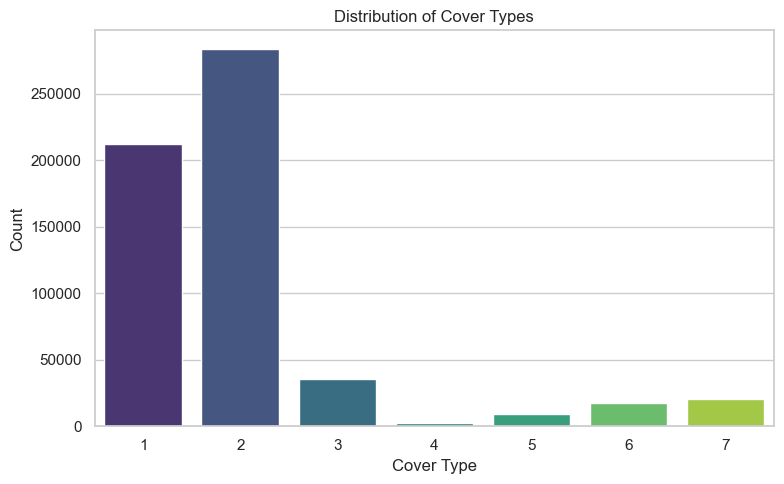

Saved: target_distribution.png


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("target_distribution.png", dpi=300)
plt.show()

print("Saved: target_distribution.png")

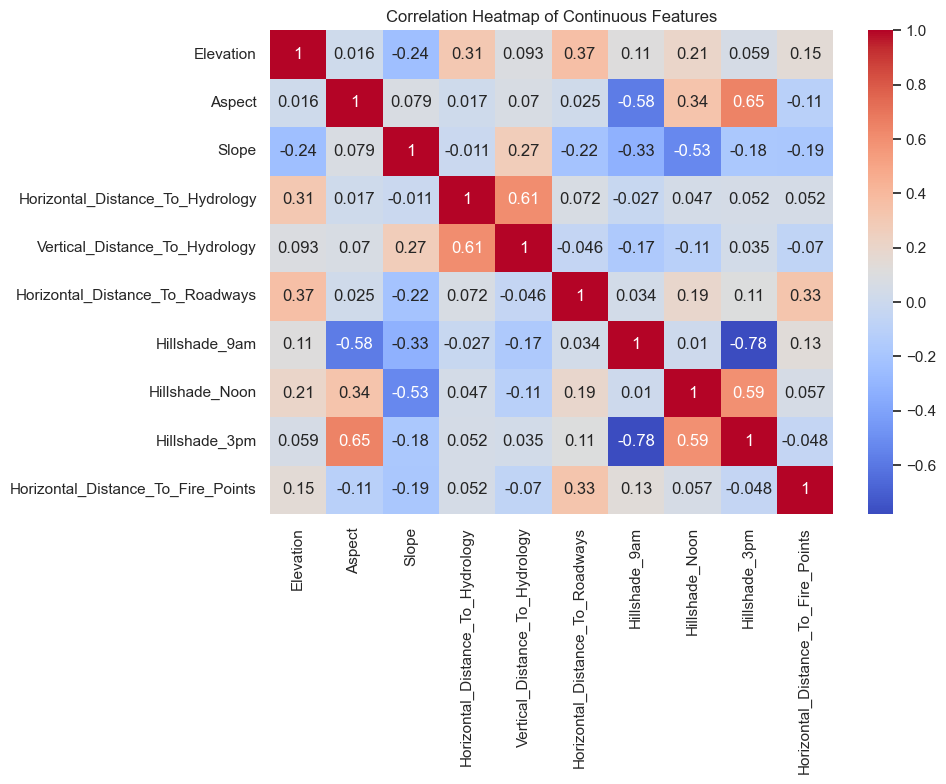

Saved: correlation_heatmap.png


In [33]:
plt.figure(figsize=(10,8))
corr = df[continuous_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

print("Saved: correlation_heatmap.png")


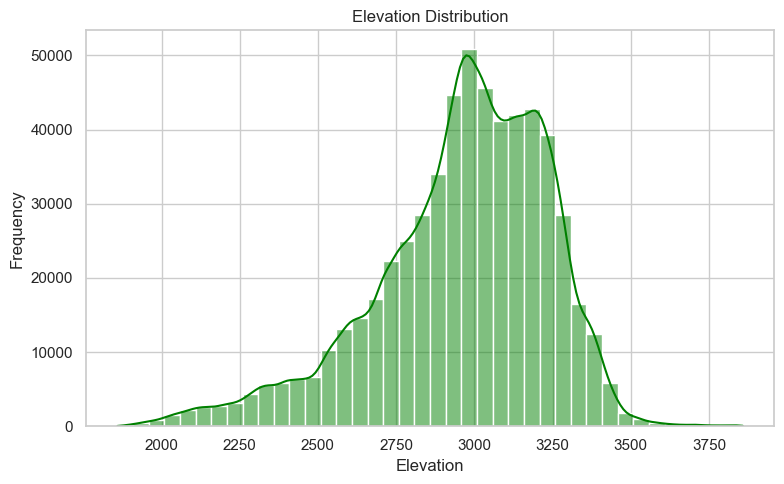

Saved: elevation_histogram.png


In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Elevation'], bins=40, kde=True, color='green')
plt.title("Elevation Distribution")
plt.xlabel("Elevation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("elevation_histogram.png", dpi=300)
plt.show()

print("Saved: elevation_histogram.png")


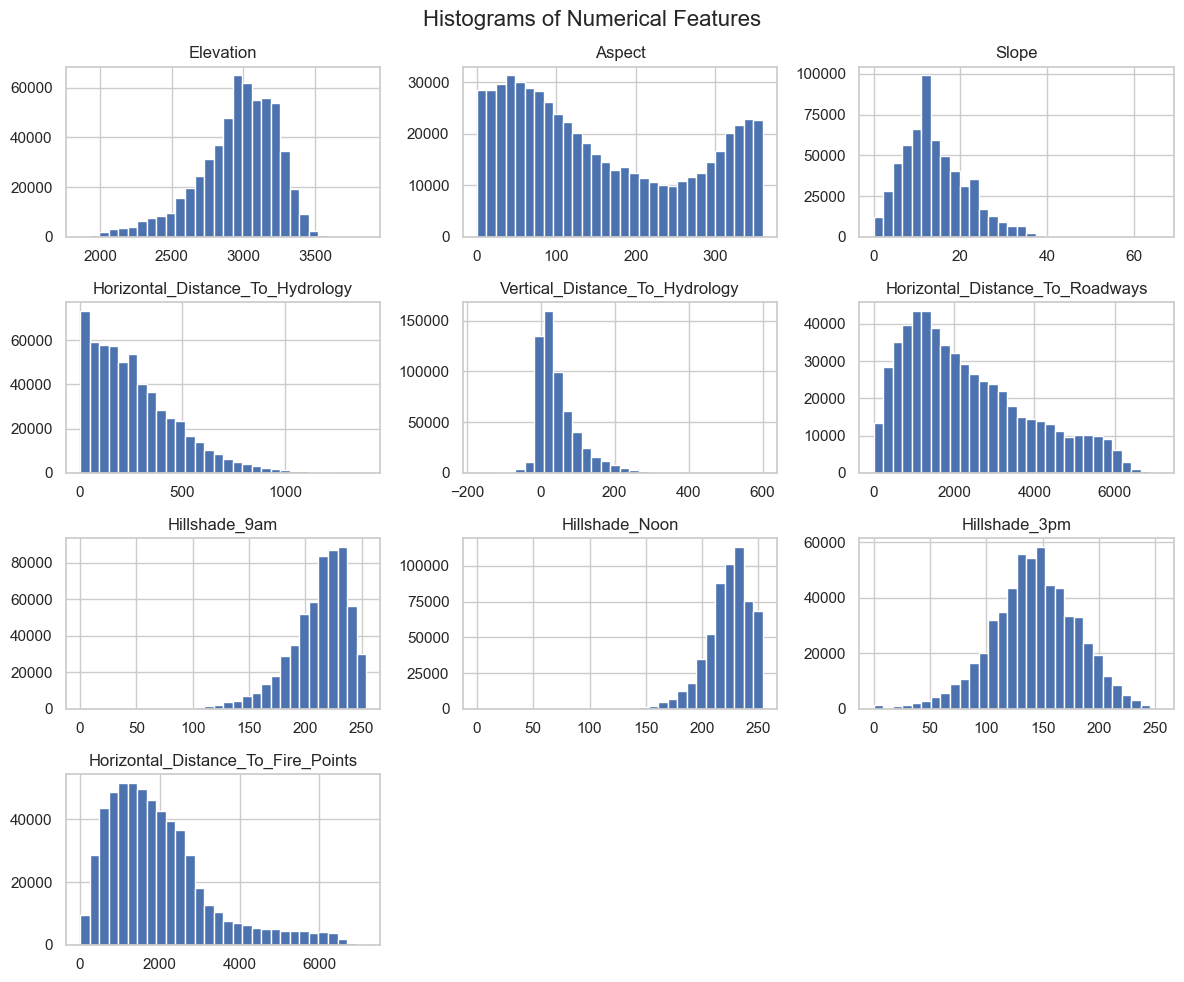

Saved: numerical_histograms.png


In [35]:
df[continuous_cols].hist(figsize=(12,10), bins=30)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.savefig("numerical_histograms.png", dpi=300)
plt.show()

print("Saved: numerical_histograms.png")


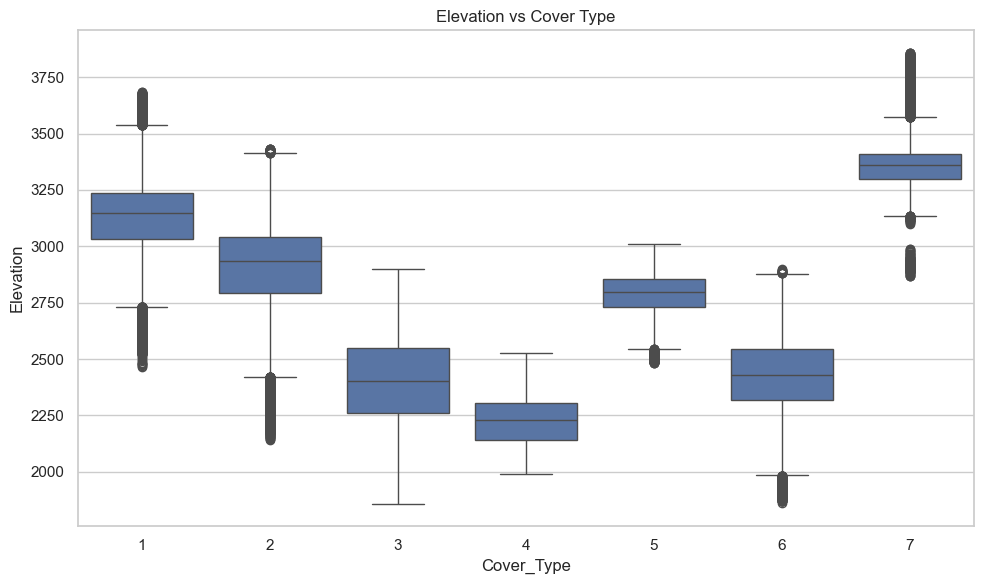

Saved: elevation_vs_cover_type.png


In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Cover_Type'], y=df['Elevation'])
plt.title("Elevation vs Cover Type")
plt.tight_layout()
plt.savefig("elevation_vs_cover_type.png", dpi=300)
plt.show()

print("Saved: elevation_vs_cover_type.png")


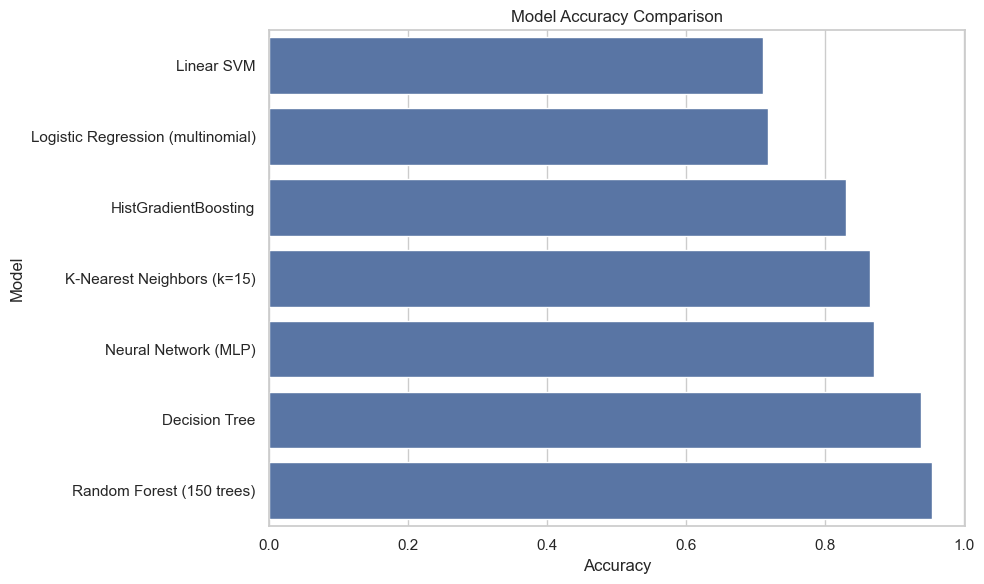

Saved: model_accuracy_comparison.png


In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values("Accuracy"))
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png", dpi=300)
plt.show()

print("Saved: model_accuracy_comparison.png")


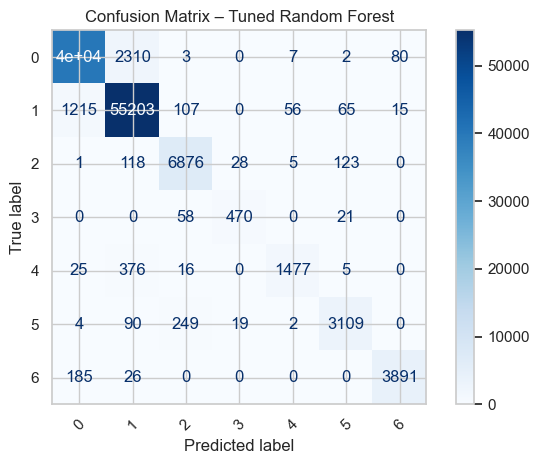

Saved: rf_confusion_matrix.png


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix – Tuned Random Forest")
plt.tight_layout()
plt.savefig("rf_confusion_matrix.png", dpi=300)
plt.show()

print("Saved: rf_confusion_matrix.png")


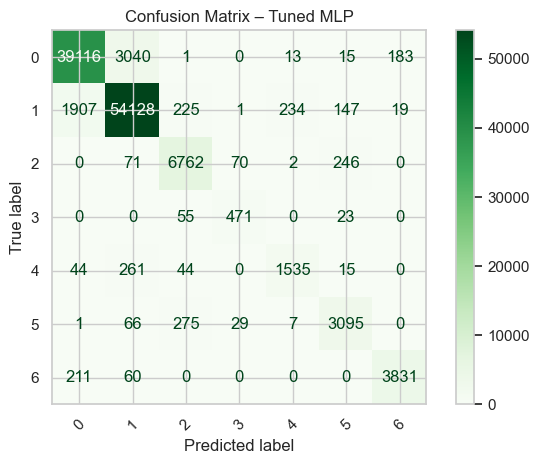

Saved: mlp_confusion_matrix.png


In [39]:
cm = confusion_matrix(y_test, y_pred_mlp_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", xticks_rotation=45)
plt.title("Confusion Matrix – Tuned MLP")
plt.tight_layout()
plt.savefig("mlp_confusion_matrix.png", dpi=300)
plt.show()

print("Saved: mlp_confusion_matrix.png")


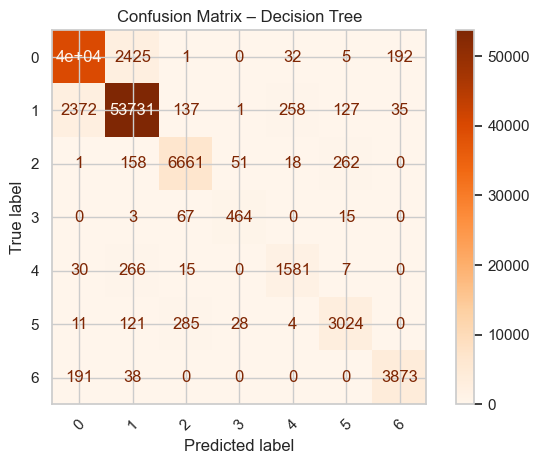

Saved: dt_confusion_matrix.png


In [40]:
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges", xticks_rotation=45)
plt.title("Confusion Matrix – Decision Tree")
plt.tight_layout()
plt.savefig("dt_confusion_matrix.png", dpi=300)
plt.show()

print("Saved: dt_confusion_matrix.png")
